## Summary

In this project plots are created using pyplot and matplotlib directly. When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome. Thankfully, pandas has many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.

The explored data set is that of job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

<ul>
    <li>Rank - Rank by median earnings (the dataset is ordered by this column).</li>
    <li>Major_code - Major code.</li>
    <li>Major - Major description.</li>
    <li>Major_category - Category of major.</li>
    <li>Total - Total number of people with major.</li>
    <li>Sample_size - Sample size (unweighted) of full-time.</li>
    <li>Men - Male graduates.</li>
    <li>Women - Female graduates.</li>
    <li>ShareWomen - Women as share of total.</li>
    <li>Employed - Number employed.</li>
    <li>Median - Median salary of full-time, year-round workers.</li>
    <li>Low_wage_jobs - Number in low-wage service jobs.</li>
    <li>Full_time - Number employed 35 hours or more.</li>
    <li>Part_time - Number employed less than 35 hours.</li>
</ul>
Using visualizations, these questions from the dataset are explored:
<ul>
    <li>Do students in more popular majors make more money?</li>
    <li>Using scatter plots</li>
    <li>How many majors are predominantly male? Predominantly female?</li>
    <li>Using histograms</li>
    <li>Which category of majors have the most students?</li>
    <li>Using bar plots</li>
</ul>


In [1]:
#!/usr/bin/env python
# coding: utf-8
# Import packages and data

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')


In [2]:
recent_grads=pd.read_csv("recent-grads.csv")
# ### Explore data - look at the data
# look at the first row
recent_grads.iloc[0]
# Look at the complete data set
recent_grads.info()
# Major and Major_category are categorical variables, the others are of type float and integer.
recent_grads[0:5]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
# There are categorical variables like Major and numerical variables like Total. 
# There also statistics like Median allready calculated.
recent_grads.describe().head(n=10)


,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [5]:
# DataFrame.isna()
# Count na values by variable
recent_grads.isnull().sum()


Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [6]:
raw_data_count=recent_grads.shape[0]
print(raw_data_count)
# Clean the data
recent_grads=recent_grads.dropna(how = 'all')
print(recent_grads.isnull().sum())
cleaned_data_count = recent_grads.shape[0]
print(cleaned_data_count)
# Data analysis
print(recent_grads['Major'])
print(recent_grads['Employed'].unique().shape[0])
valuecounts_employed=recent_grads['Employed'].value_counts()
print(valuecounts_employed.iloc[0:10])



173
Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64
173
0                              PETROLEUM ENGINEERING
1                     MINING AND MINERAL ENGINEERING
2                          METALLURGICAL ENGINEERING
3          NAVAL ARCHITECTURE AND MARINE ENGINEERING
4                               CHEMICAL ENGINEERING
5                                NUCLEAR ENGINEERING
6                                  ACTUARIAL SCIENCE
7                         ASTRONOMY AND ASTROPHYSICS
8        

[2 1]
1
2
count    171.000000
mean       1.011696
std        0.107829
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Employed, dtype: float64


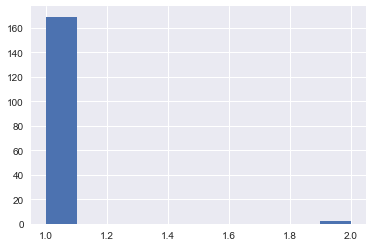

2
4212


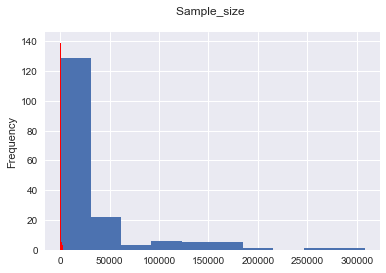

In [7]:
print(valuecounts_employed.unique())
print(valuecounts_employed.min())
print(valuecounts_employed.max())
print(valuecounts_employed.describe())

fig, ax = plt.subplots()
ax.hist(valuecounts_employed)
plt.show()
recent_grads['Employed'].plot(kind='hist')

print(recent_grads['Sample_size'].min())
print(recent_grads['Sample_size'].max())
recent_grads['Sample_size'].plot(kind='hist', bins=10, color="red")
plt.title("Sample_size \n")
plt.show()



22000
110000
88000


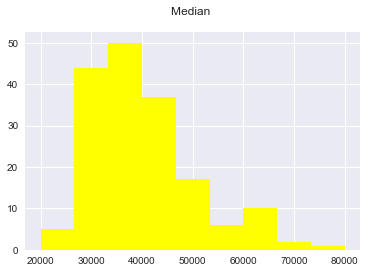

In [8]:
print(recent_grads['Median'].min())
print(recent_grads['Median'].max())
print(recent_grads['Median'].max() - recent_grads['Median'].min())
recent_grads['Median'].hist(bins=9, color="yellow", range=(20000, 80000))
plt.title("Median \n")
plt.show()

0
307933


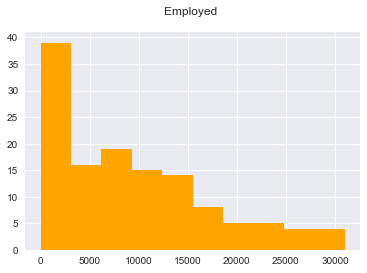

In [9]:
# The most common median salary range occurs between 34.000 and 40.000.
print(recent_grads['Employed'].min())
print(recent_grads['Employed'].max())
recent_grads['Employed'].hist(bins=10, color="orange", range=(0, 31000))
plt.title("Employed \n")
plt.show()

111
251540
251429


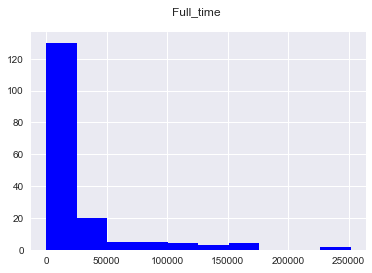

In [10]:
print(recent_grads['Full_time'].min())
print(recent_grads['Full_time'].max())
print(recent_grads['Full_time'].max() - recent_grads['Full_time'].min())
recent_grads['Full_time'].hist(bins=10, color="blue")
plt.title("Full_time \n")
plt.show()


0.0
0.968953683
0.968953683


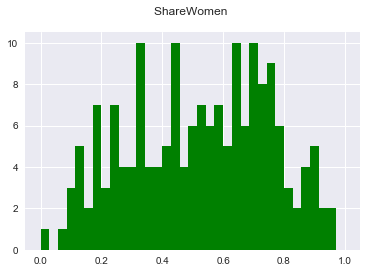

In [11]:
print(recent_grads['ShareWomen'].min())
print(recent_grads['ShareWomen'].max())
print(recent_grads['ShareWomen'].max() - recent_grads['ShareWomen'].min())
recent_grads['ShareWomen'].hist(bins=35, color="green", range=(0,1))
plt.title("ShareWomen \n")
plt.show()

0.0
0.177226407
0.177226407


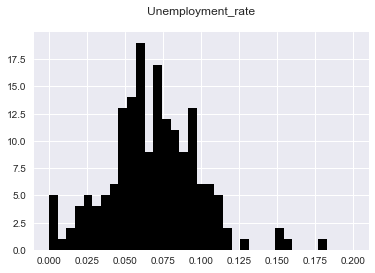

In [12]:
print(recent_grads['Unemployment_rate'].min())
print(recent_grads['Unemployment_rate'].max())
print(recent_grads['Unemployment_rate'].max() - recent_grads['Unemployment_rate'].min())
recent_grads['Unemployment_rate'].hist(bins=35, color="black", range=(0,0.2))
plt.title("Unemployment_rate\n")
plt.show()


119.0
173809.0
173690.0


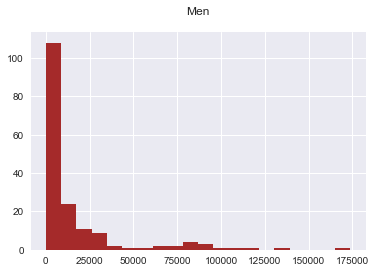

In [13]:
print(recent_grads['Men'].min())
print(recent_grads['Men'].max())
print(recent_grads['Men'].max() - recent_grads['Men'].min())
recent_grads['Men'].hist(bins=20, color="brown")
plt.title("Men\n")
plt.show()

0.0
307087.0
307087.0


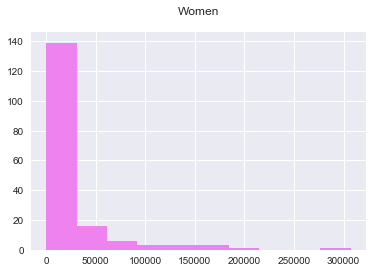

In [14]:
print(recent_grads['Women'].min())
print(recent_grads['Women'].max())
print(recent_grads['Women'].max() - recent_grads['Women'].min())
recent_grads['Women'].hist(bins=10, color="violet")
plt.title("Women\n")
plt.show()

In [15]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [16]:
major_acc = (recent_grads.loc[recent_grads['Major'] 
                              =="ACCOUNTING",['Major', 'Unemployed']])

major_chem =(recent_grads.loc[recent_grads['Major']
                              =="CHEMICAL ENGINEERING",['Major', 'Unemployed']])

print(major_acc)
print(major_chem)
print(type(major_chem))
major_sub_1 = major_acc.loc[40, ['Unemployed']]
major_sub_2 = major_chem.loc[4, ['Unemployed']]


print(major_sub_1)
print(major_sub_2)


ratio900 = major_sub_1 / major_sub_2 
print("Ratio:", ratio900)


         Major  Unemployed
40  ACCOUNTING       12411
                  Major  Unemployed
4  CHEMICAL ENGINEERING        1672
<class 'pandas.core.frame.DataFrame'>
Unemployed    12411
Name: 40, dtype: object
Unemployed    1672
Name: 4, dtype: object
Ratio: Unemployed    7.42285
dtype: object


In [17]:
# The unemployment number of Accounting majors is 7.42285 higher than that 
# of chemical engineering majors.

# In[ ]:


major_psy = (recent_grads.loc[recent_grads['Major'] 
                              =="PSYCHOLOGY",['Major', 'Unemployed']])

major_soc =(recent_grads.loc[recent_grads['Major']
                              =="SOCIOLOGY",['Major', 'Unemployed']])

print(major_psy)
print(major_soc)

print(type(major_soc))
major_sub_3 = major_psy.loc[145, ['Unemployed']]
major_sub_4 = major_soc.loc[124, ['Unemployed']]


print(major_sub_3)
print(major_sub_4)


ratio787 = major_sub_3 / major_sub_4
print("Ratio:", ratio787)

ratio787_reverse =  major_sub_4 / major_sub_3
print("Ratio:", ratio787_reverse)

          Major  Unemployed
145  PSYCHOLOGY       28169
         Major  Unemployed
124  SOCIOLOGY        8608
<class 'pandas.core.frame.DataFrame'>
Unemployed    28169
Name: 145, dtype: object
Unemployed    8608
Name: 124, dtype: object
Ratio: Unemployed    3.27242
dtype: object
Ratio: Unemployed    0.305584
dtype: object


In [18]:
# The unemployment number of Psycology majors is 3.27242 higher than that of sociology majors.
# The unemployment number of Sociology majors is 0.305584 smaller than that of psycolog majors.
# This relationship is contra intuitive to a degree. 
# This can be further investigated. A starting point woud be to make the unemployment numbers of the two majors comparable.
gra_major_une_111 =(recent_grads.groupby('Major')
                    ['Unemployed'].sum().sort_values(ascending=False))
# print(gra_major_une_111)
print(type(gra_major_une_111))
print(gra_major_une_111[0:20])



<class 'pandas.core.series.Series'>
Major
PSYCHOLOGY                                       28169
BUSINESS MANAGEMENT AND ADMINISTRATION           21502
POLITICAL SCIENCE AND GOVERNMENT                 15022
GENERAL BUSINESS                                 14946
COMMUNICATIONS                                   14602
ENGLISH LANGUAGE AND LITERATURE                  14345
BIOLOGY                                          13874
ACCOUNTING                                       12411
MARKETING AND MARKETING RESEARCH                 11663
ECONOMICS                                        11452
CRIMINAL JUSTICE AND FIRE PROTECTION             11268
HISTORY                                          11176
FINANCE                                           9413
COMMERCIAL ART AND GRAPHIC DESIGN                 8947
SOCIOLOGY                                         8608
NURSING                                           8497
ELEMENTARY EDUCATION                              7297
GENERAL EDUCATION      

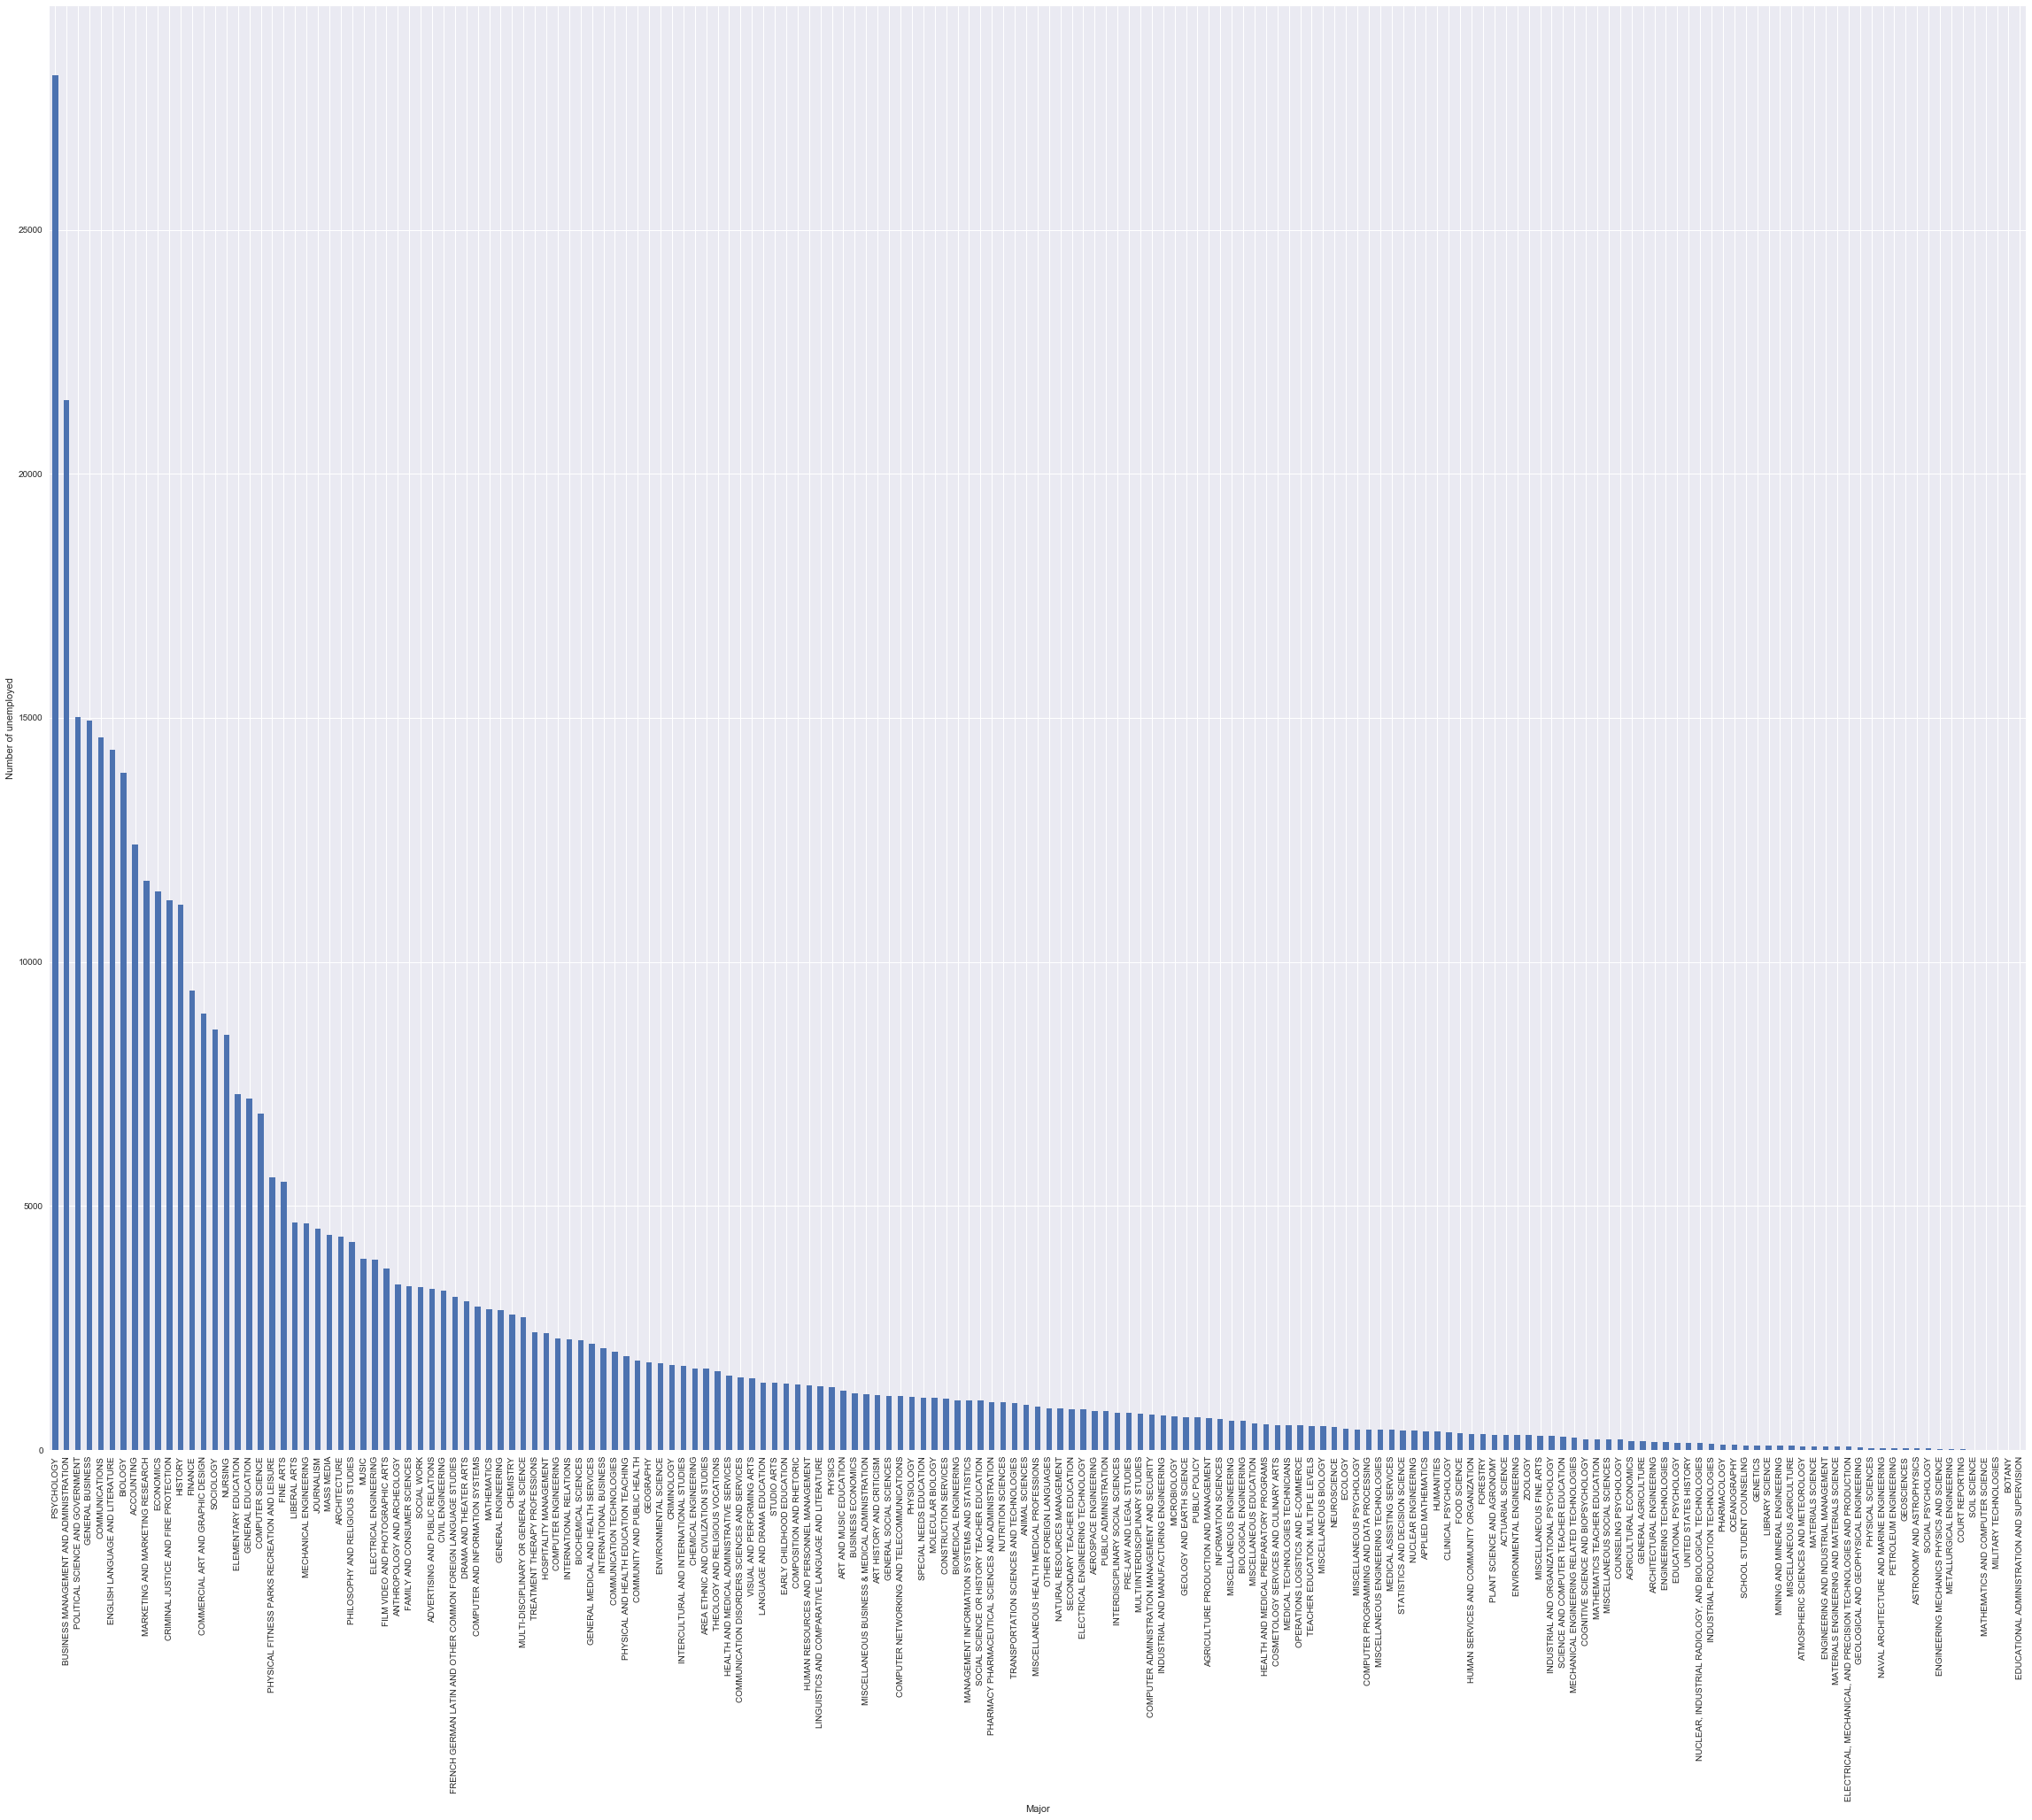

<class 'pandas.core.frame.DataFrame'>
                                     Total  Unemployed
Major_category                                        
Agriculture & Natural Resources    75620.0        3824
Arts                              357130.0       28228
Biology & Life Science            453862.0       22854
Business                         1302376.0       79877
Communications & Journalism       392601.0       26852


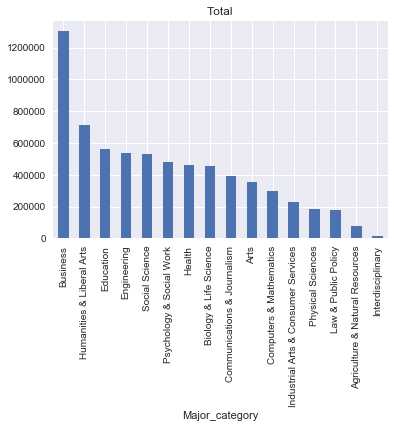

In [19]:
gra_major_une_111.plot(kind="bar", figsize=(40,30))
plt.xlabel("Major")
plt.ylabel("Number of unemployed")
plt.show()
# The distribution of unemployment is heavily right skewed. Which major has the lowest unemployment number?
# Explore the variable Major_category - Category of major from Carnevale et al
# Total number of major students by Major_category

mjc222 = recent_grads.groupby("Major_category")[["Total", "Unemployed"]].sum()
print(type(mjc222))
print(mjc222.head())

mjc222["Total"].sort_values(ascending=False).plot(kind = "bar")
plt.title("Total")
plt.show()



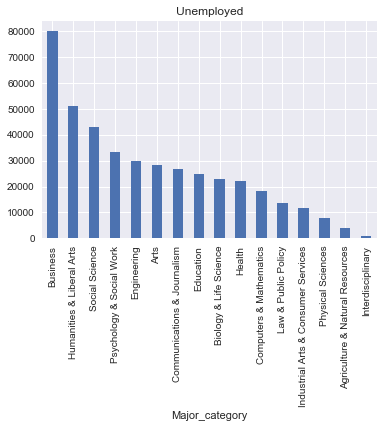

                                         Total  Unemployed  \
Major_category                                               
Agriculture & Natural Resources        75620.0        3824   
Arts                                  357130.0       28228   
Biology & Life Science                453862.0       22854   
Business                             1302376.0       79877   
Communications & Journalism           392601.0       26852   
Computers & Mathematics               299008.0       18373   
Education                             559129.0       24969   
Engineering                           537583.0       29817   
Health                                463230.0       22213   
Humanities & Liberal Arts             713468.0       51101   
Industrial Arts & Consumer Services   229792.0       11526   
Interdisciplinary                      12296.0         749   
Law & Public Policy                   179107.0       13495   
Physical Sciences                     185479.0        7880   
Psycholo

In [20]:
mjc222["Unemployed"].sort_values(ascending=False).plot(kind = "bar")
plt.title("Unemployed")
plt.show()
# Business (1302376.0) and Humanities & Liberal Arts (713468.0) are the majors with the highest number of major students. They have also the highest unemployment rate. Social science has the third highest unemployment rate but only the fifth highest number of majors. This means the chance of being 
# unemployed is comparable higher for majors of the social science.
# Number of Unemployed by total number of majors in major categories
mjc222["Rate_ue"] = mjc222["Unemployed"] / mjc222["Total"]
mjc222["Rate_ue_1000"] = mjc222["Rate_ue"] * 1000

# print(df.to_string())
# Render a DataFrame to a console-friendly tabular output
print(mjc222.to_string(line_width=70, justify="start", col_space=1))


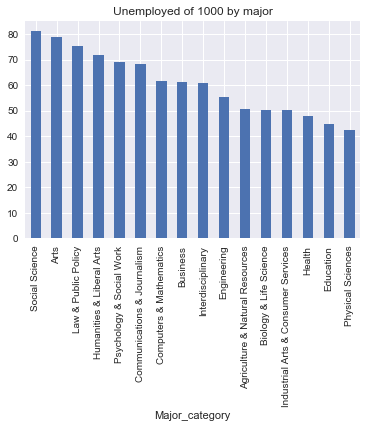

In [21]:
mjc222["Rate_ue_1000"].sort_values(ascending=False).plot(kind="bar")
plt.title("Unemployed of 1000 by major")
plt.show()


In [22]:
# Additonal plots of "Unemployment rate per 1000 majors" with matplotlib 
# and matplotlib using the fig and ax method for better comparison.
# Data preprocessing: turn index into column
# mjc222.info()

mjc999 = mjc222.reset_index()
mjc999 = mjc999.sort_values(by = "Rate_ue_1000" , ascending=False)
mjc999.info()
print(mjc999.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 15 to 13
Data columns (total 5 columns):
Major_category    16 non-null object
Total             16 non-null float64
Unemployed        16 non-null int64
Rate_ue           16 non-null float64
Rate_ue_1000      16 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 768.0+ bytes
               Major_category     Total  Unemployed   Rate_ue  Rate_ue_1000
15             Social Science  529966.0       42975  0.081090     81.090108
1                        Arts  357130.0       28228  0.079041     79.041245
12        Law & Public Policy  179107.0       13495  0.075346     75.346022
9   Humanities & Liberal Arts  713468.0       51101  0.071623     71.623394
14   Psychology & Social Work  481007.0       33292  0.069213     69.213130


In [23]:
mjc323_labels = mjc999["Major_category"].tolist()
print(type(mjc323_labels))
print(len(mjc323_labels))
print(mjc323_labels)


<class 'list'>
16
['Social Science', 'Arts', 'Law & Public Policy', 'Humanities & Liberal Arts', 'Psychology & Social Work', 'Communications & Journalism', 'Computers & Mathematics', 'Business', 'Interdisciplinary', 'Engineering', 'Agriculture & Natural Resources', 'Biology & Life Science', 'Industrial Arts & Consumer Services', 'Health', 'Education', 'Physical Sciences']


In [24]:
mjc999_2 = mjc999.sort_values(by = "Unemployed" , ascending=False)
mjc323_labels_2 = mjc999_2["Major_category"].tolist()
print(mjc323_labels_2)


['Business', 'Humanities & Liberal Arts', 'Social Science', 'Psychology & Social Work', 'Engineering', 'Arts', 'Communications & Journalism', 'Education', 'Biology & Life Science', 'Health', 'Computers & Mathematics', 'Law & Public Policy', 'Industrial Arts & Consumer Services', 'Physical Sciences', 'Agriculture & Natural Resources', 'Interdisciplinary']


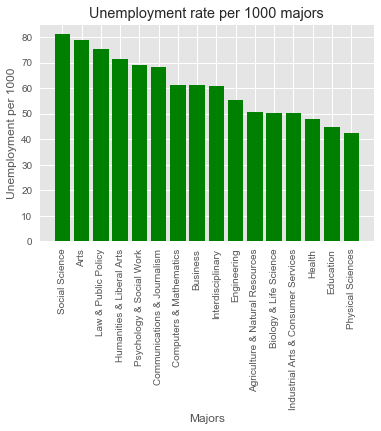

In [25]:
# Using matplotlib for a bar plot directly

plt.style.use('ggplot')

y_rate_323 = mjc999["Rate_ue_1000"].tolist()

# there are several methods to get a sequence over the 
# length of column names
x_pos_323 = [i for i, _ in enumerate(mjc323_labels)]

plt.bar(x_pos_323, y_rate_323, color='green')
plt.xlabel("Majors")
plt.ylabel("Unemployment per 1000")
plt.title("Unemployment rate per 1000 majors")

plt.xticks(x_pos_323, mjc323_labels, rotation=90)

plt.show()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 15 to 13
Data columns (total 5 columns):
Major_category    16 non-null object
Total             16 non-null float64
Unemployed        16 non-null int64
Rate_ue           16 non-null float64
Rate_ue_1000      16 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 768.0+ bytes
None
16
16


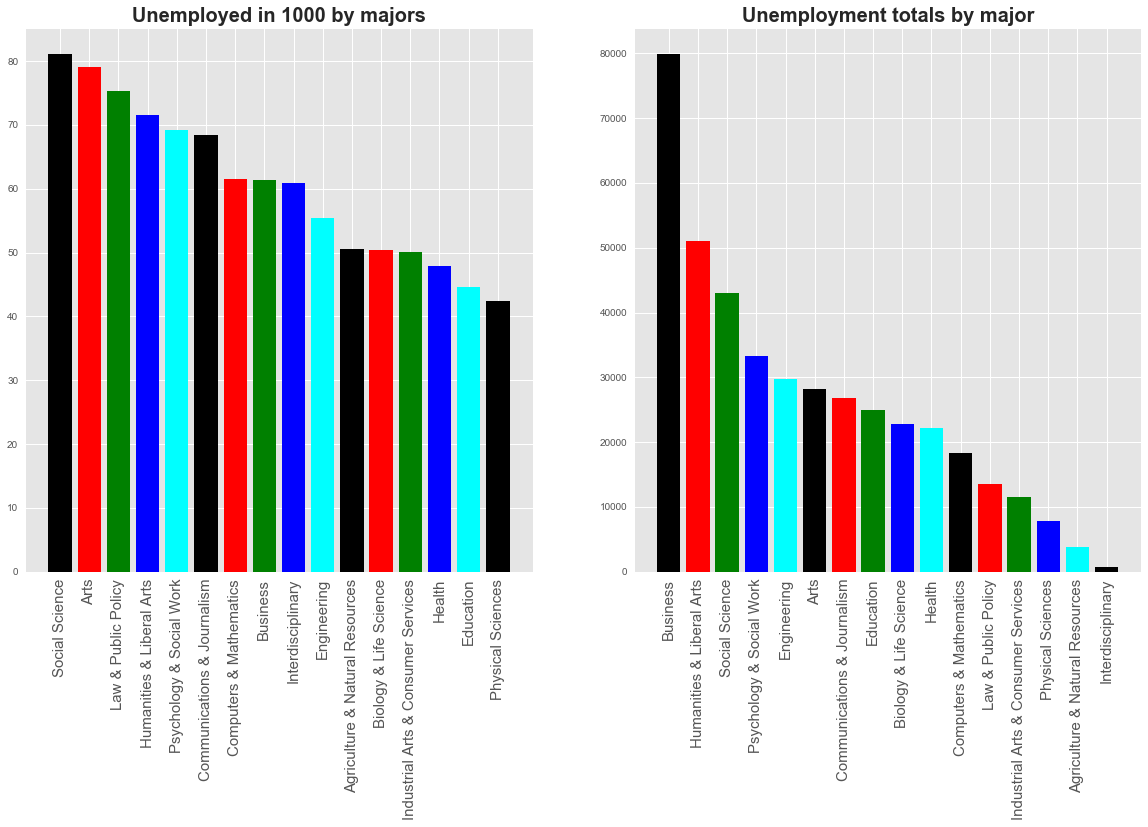

In [26]:
print(mjc999.info())


# In[ ]:



fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# preparing plot 1 = ax.1
# calculating the variables for ax1.bar
# alternative method to get the sequence
range_111 = range(len(mjc999["Major_category"]))
print(len(range_111))
height_111 = mjc999["Rate_ue_1000"].sort_values(ascending=False).tolist()
print(len(height_111))

ax1.bar(range_111, height_111, 
        color=['black', 'red', 'green', 'blue', 'cyan'])
# Important: using ax method xticklabels and x-ticks 
# are defined in two different calls and not in one plt.xticks
ax1.set_xticks(range_111)
ax1.set_xticklabels(labels=mjc323_labels, rotation=90, fontsize=15)
ax1.set_title(label="Unemployed in 1000 by majors",
              fontsize=20, weight="bold")

# preparing plot 1 = ax.2
# labels are the same: mjc323_labels
# position on x axis are the same: x_pos_323

ax_2_height = mjc999["Unemployed"].sort_values(ascending=False).tolist()
ax2.bar(range_111, ax_2_height, 
        color=['black', 'red', 'green', 'blue', 'cyan'])
ax2.set_xticks(range_111)
ax2.set_xticklabels(labels=mjc323_labels_2, rotation=90, fontsize=15)
ax2.set_title(label="Unemployment totals by major",
              fontsize=20, weight="bold")


plt.show()


Major_category
Agriculture & Natural Resources         3824
Arts                                   28228
Biology & Life Science                 22854
Business                               79877
Communications & Journalism            26852
Computers & Mathematics                18373
Education                              24969
Engineering                            29817
Health                                 22213
Humanities & Liberal Arts              51101
Industrial Arts & Consumer Services    11526
Interdisciplinary                        749
Law & Public Policy                    13495
Physical Sciences                       7880
Psychology & Social Work               33292
Social Science                         42975
Name: Unemployed, dtype: int64


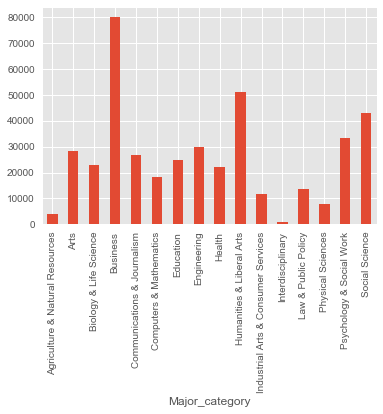

In [27]:
# The unemployment rate per 1000 shows a slightly different picture than the 
# unemployment totals. For example business majors have the highest 
# unemployment total but ranked eight on thousand. Also arts is second on thousand but sixth on totals. Engineering is fifth on totals but only tenth on thousand. A little bit surprinsing is computer science. It is eleven on totals but seventh on thousands. Relative to total of majors the chance of unemployment is relative higher for computer science than business and or agriculture.

mjc555 = recent_grads.groupby("Major_category")["Unemployed"].sum()
print(mjc555)
mjc555.plot(kind="bar")


Major_category
Agriculture & Natural Resources        0.563283
Arts                                   0.721382
Biology & Life Science                 0.852849
Business                               0.923826
Communications & Journalism            0.302151
Computers & Mathematics                0.926816
Education                              0.827232
Engineering                            1.836682
Health                                 0.791042
Humanities & Liberal Arts              1.215114
Industrial Arts & Consumer Services    0.336499
Interdisciplinary                      0.070861
Law & Public Policy                    0.454024
Physical Sciences                      0.465111
Psychology & Social Work               0.648583
Social Science                         0.861559
Name: Unemployment_rate, dtype: float64


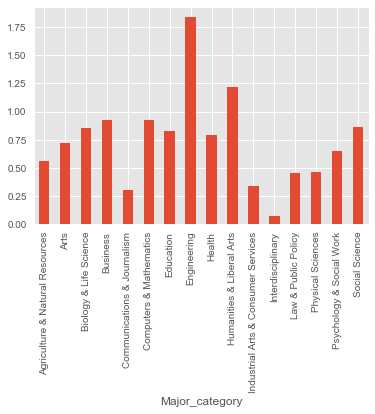

In [28]:
# Unweighted unemployment is highest in business with 79877, 
# followed by liberal arts with 51101. While liberal arts is in line with
# expectations, the umemployment in business
# Unemployment_rate Unemployed / (Unemployed + Employed)

# recent_grads.info()

mjc666 = recent_grads.groupby("Major_category")["Unemployment_rate"].sum()
print(mjc666)
mjc666.plot(kind="bar")



Major_category
Agriculture & Natural Resources        0.563283
Arts                                   0.721382
Biology & Life Science                 0.852849
Business                               0.923826
Communications & Journalism            0.302151
Computers & Mathematics                0.926816
Education                              0.827232
Engineering                            1.836682
Health                                 0.791042
Humanities & Liberal Arts              1.215114
Industrial Arts & Consumer Services    0.336499
Interdisciplinary                      0.070861
Law & Public Policy                    0.454024
Physical Sciences                      0.465111
Psychology & Social Work               0.648583
Social Science                         0.861559
Name: Unemployment_rate, dtype: float64


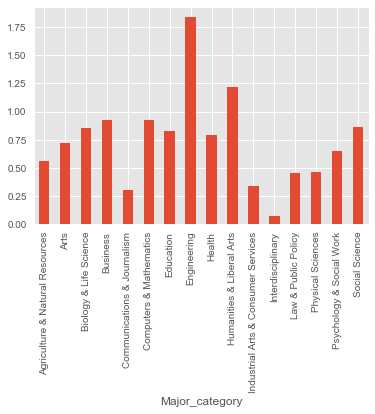

In [29]:
# Unemployment_rate Unemployed / (Unemployed + Employed)
# recent_grads.info()

mjc666 = recent_grads.groupby("Major_category")["Unemployment_rate"].sum()
print(mjc666)
mjc666.plot(kind="bar")



In [30]:
# Turn pandas series into df and index into column

gra_major_une_222 = gra_major_une_111.reset_index()

print(gra_major_une_222.head())
print(type(gra_major_une_222))

# Sort by Unemployed in ascending order
gra_major_une_343 = gra_major_une_222.sort_values(by="Unemployed")

# print(gra_major_une_343.head())
print(type(gra_major_une_343))

print(gra_major_une_343[0:10])


                                    Major  Unemployed
0                              PSYCHOLOGY       28169
1  BUSINESS MANAGEMENT AND ADMINISTRATION       21502
2        POLITICAL SCIENCE AND GOVERNMENT       15022
3                        GENERAL BUSINESS       14946
4                          COMMUNICATIONS       14602
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
                                          Major  Unemployed
172  EDUCATIONAL ADMINISTRATION AND SUPERVISION           0
168                                SOIL SCIENCE           0
171                                      BOTANY           0
170                       MILITARY TECHNOLOGIES           0
169            MATHEMATICS AND COMPUTER SCIENCE           0
167                             COURT REPORTING          11
166                   METALLURGICAL ENGINEERING          16
165   ENGINEERING MECHANICS PHYSICS AND SCIENCE          23
164                           SOCIAL PSYCHOLOGY          33


In [31]:
# The top ten of of majors with the lowest 
# unemployment number has a range of unemloyment from 0 to 33.
# The lowest unemployment number of 0 is shared by 5 majors. 
# While MATHEMATICS AND COMPUTER SCIENCE is expected to have low unemployment
# number, EDUCATIONAL ADMINISTRATION AND SUPERVISION is suprising.
# Another question could be to investigate the income 
# difference for this two majors. While unemployment number is the same
# the intuition would assume a higher income for 
# MATHEMATICS AND COMPUTER SCIENCE than for EDUCATIONAL 
# ADMINISTRATION AND SUPERVISION. 

# In[ ]:


recent_grads.loc[(recent_grads["Major"]=="MATHEMATICS AND COMPUTER SCIENCE") | 
                 (recent_grads["Major"]=="EDUCATIONAL ADMINISTRATION AND SUPERVISION"), 
                 ["Major", "Median"]]




,Major,Median
52,MATHEMATICS AND COMPUTER SCIENCE,42000
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,34000


                 Major                  Time   value
213         ACCOUNTING             Part_time   27693
386         ACCOUNTING  Full_time_year_round  123169
40          ACCOUNTING             Full_time  151967
352  ACTUARIAL SCIENCE  Full_time_year_round    2482
6    ACTUARIAL SCIENCE             Full_time    2924
                        value
Time                         
Full_time             4503070
Full_time_year_round  3407136
Part_time             1528005
<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 no

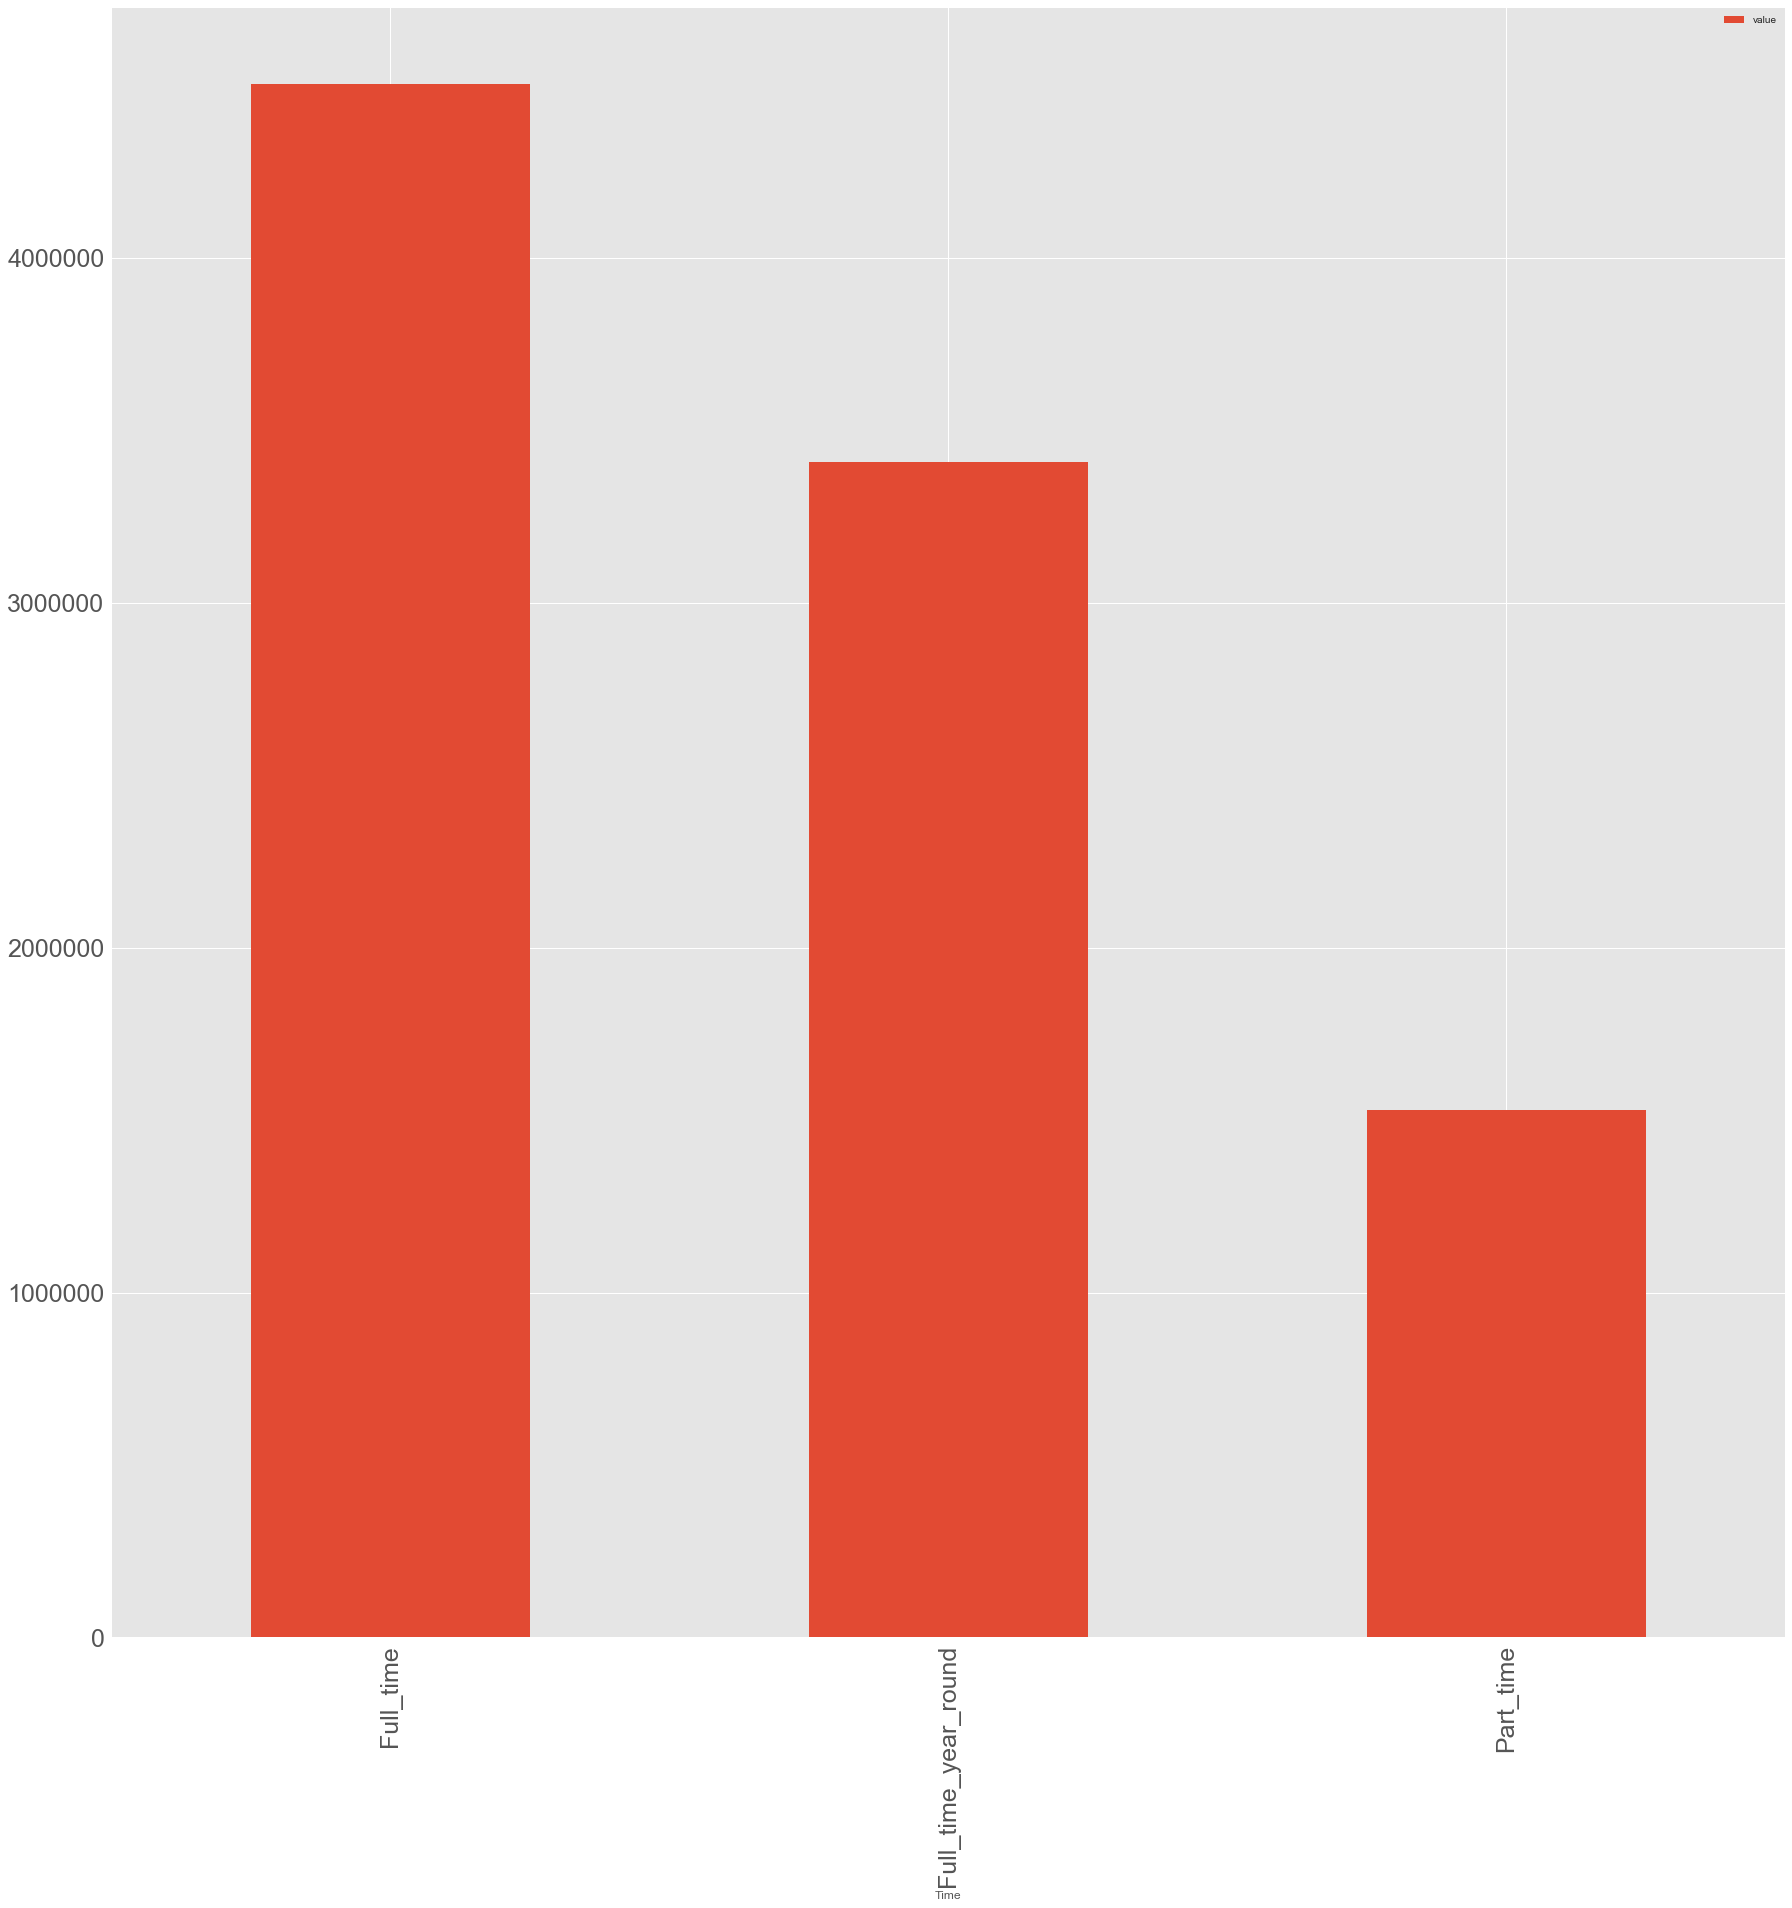

In [32]:
# In compliance with expectations majors of MATHEMATICS AND COMPUTER SCIENCE 
# earn more than majors of EDUCATIONAL ADMINISTRATION AND SUPERVISION. Contrary they earn only $ 8.000 more in the first year fully employed. The expectation in income difference is higher than it is actually. 

# Make a copy of the df to secure data integrity
recent_grads_melt_111 = recent_grads.copy()
# recent_grads_melt_111.info()


# Using melt to make wide df with many columns a long df with 2 columns 
# (name-variable, value). This makes groupby more easy.

recent_grads_melt_time_111 = (pd.melt(recent_grads_melt_111, 
                                      value_vars=["Full_time", "Part_time", "Full_time_year_round"],
                                      id_vars="Major", var_name="Time").sort_values(by="Major"))

print(recent_grads_melt_time_111.head())


# In accounting 27693 worked part time and 151967 worked full time.

recent_grads_melt_time_group_111=(recent_grads_melt_time_111.
                                  groupby('Time').sum())

print(recent_grads_melt_time_group_111)

recent_grads_melt_time_group_111.plot(kind="bar", figsize=(30,30), fontsize=25)


# Over all majors  4500512 worked full time and 1526884 part time.

recent_grads_222 = recent_grads.copy()
recent_grads_222.info()
recent_grads_melt_222 = (pd.melt(recent_grads_222, value_vars=['Men', 'Women'], 
                                 id_vars=["Unemployed", "Employed", "Major", "Total"], var_name="Gender", 
                                 value_name="Count"))

print(type(recent_grads_melt_222))


In [33]:
recent_grads_melt_222[0:10]
# In PETROLEUM ENGINEERING  2057.0 of total 2339.0 were men. In NAVAL ARCHITECTURE AND MARINE ENGINEERING were 1123.0 of total 1258.0 were men.
recent_grads_melt_major_222=(recent_grads_melt_222.
                             sort_values(by="Major"))

gender_petro=(recent_grads_melt_major_222[recent_grads_melt_major_222
                             ['Major']=="PETROLEUM ENGINEERING"])

print(gender_petro)
gender_petro['Gender']
gender_petro['Count']



     Unemployed  Employed                  Major   Total Gender   Count
173          37      1976  PETROLEUM ENGINEERING  2339.0  Women   282.0
0            37      1976  PETROLEUM ENGINEERING  2339.0    Men  2057.0


173     282.0
0      2057.0
Name: Count, dtype: float64

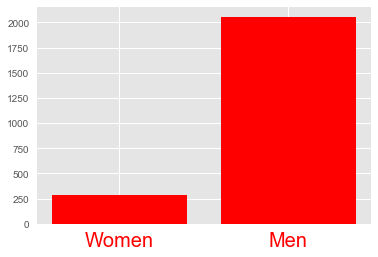

     Unemployed  Employed       Major     Total Gender     Count
318       28169    307933  PSYCHOLOGY  393735.0  Women  307087.0
145       28169    307933  PSYCHOLOGY  393735.0    Men   86648.0


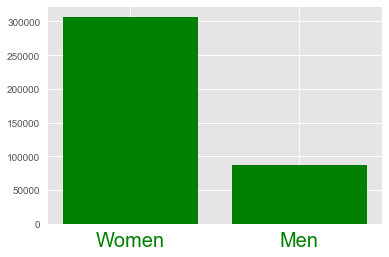

            Total      Count
Gender                      
Men     6771654.0  2876426.0
Women   6771654.0  3895228.0
        Unemployed  Employed      Total      Count
Gender                                            
Men         418025   5396348  6771654.0  2876426.0
Women       418025   5396348  6771654.0  3895228.0


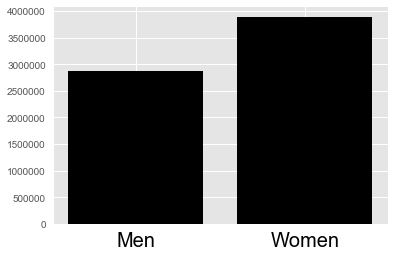

In [34]:
plt.bar(range(len(gender_petro['Count'])),gender_petro['Count'], 
        align="center", color="red")
plt.xticks(range(2), ['Women', 'Men'], color='red', fontsize=20)
plt.show()
# In PETROLEUM ENGINEERING the number of majors by men is with 2057.0 higher than that of 
# women with 282.0. The total of majors is 2339.0.

gender_psy=(recent_grads_melt_major_222[recent_grads_melt_major_222
                             ['Major']=="PSYCHOLOGY"])

print(gender_psy)
range_psy=range(len(gender_psy['Count']))
height_psy=gender_psy['Count']
plt.bar(range_psy , height_psy, 
        align="center", color="green")
plt.xticks(range(2), ['Women', 'Men'], color='green', fontsize=20)
plt.show()
# In PSYCHOLOGY the number of majors by men is with 307087.0 
# higher than that of women with 86648.0. 
# The total of majors is 393735.0.
print(recent_grads_melt_222.groupby('Gender')['Total', 'Count'].sum())
print(recent_grads_melt_222.groupby('Gender').sum())
gender_total_555 = recent_grads_melt_222.groupby('Gender')['Total', 'Count'].sum()

plt.bar(range(len(gender_total_555['Count'])),gender_total_555['Count'], 
        align="center", color="black")
plt.xticks(range(2), ['Men', 'Women'], color='black', fontsize=20)
plt.show()


   Sample_size  Employed
0           36      1976
1            7       640
2            3       648
3           16       758
4          289     25694
4212
2
             Sample_size  Employed
Sample_size     1.000000  0.964462
Employed        0.964462  1.000000


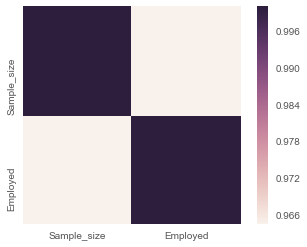

In [35]:
# Of 6771654.0 majors 2876426.0 are men and 3895228.0 are women.
# Bivariate explorations of the data set 
# Bivariate exploration of two numerical variables
# Explore Sample_size and Employed
# Make a df
df_344 = recent_grads[["Sample_size", "Employed"]]

print(df_344.head())
print(recent_grads["Sample_size"].max())
print(recent_grads["Sample_size"].min())


# Make a scatter plotgrads.plot(x='Sample_size', y='Employed', kind='scatter')
# Calculate correlation
df_corr_344 = df_344.corr()
print(df_corr_344)


# Make a heat map out of correlations
sns.heatmap(df_corr_344 , square=True)



[[ 36]
 [  7]
 [  3]
 [ 16]
 [289]]
<class 'numpy.ndarray'>
173
[[ 36]
 [  7]
 [  3]
 [ 16]
 [289]]
[[ 1976]
 [  640]
 [  648]
 [  758]
 [25694]]
<class 'numpy.ndarray'>
[[ 1976]
 [  640]
 [  648]
 [  758]
 [25694]]


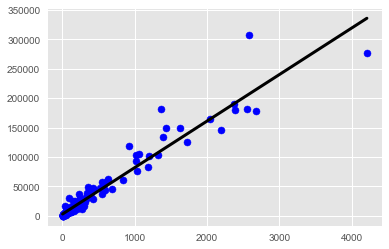

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [36]:
# There is a strong positive correlation between the two variables
# Doing a regression analysis
# Create feature and target arrays. 'Employed' is the response, dependent variable to be 
# forcasted or classified. Features ("Sample_size") are the independent variables, predictors; 
# targets are the dependent or response variable, both are the building blocks of labeled data.

X_344 =df_344.drop(["Employed"], axis=1).values 
print(X_344[0:5,])
print(type(X_344))
print(len(X_344))
X_344=X_344.reshape(-1,1)
print(X_344[0:5,])


Y_344 = df_344.drop('Sample_size', axis=1).values
print(Y_344[0:5,])
print(type(Y_344))
Y_344=Y_344.reshape(-1,1)
print(Y_344[0:5,])


# Fiting a regression model
reg = linear_model.LinearRegression() 
reg.fit(X_344, Y_344)
# linspace = sequence
prediction_space = np.linspace(min(X_344), 
max(X_344)).reshape(-1, 1) 
plt.scatter(X_344, Y_344, color='blue') 
plt.plot(prediction_space, reg.predict(prediction_space),
         color='black', linewidth=3)
plt.show()
recent_grads.info()


In [37]:
# Creating a k-Nearest Neighbors
# Reshape the data for KNN
X_555 = recent_grads[['Sample_size','Unemployment_rate']].values
Y_555 = recent_grads["Employed"].values 

print("X: ", X_555.shape)
print("Y: ", Y_555.shape)
# Fitting a knn model
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6, algorithm='brute')

# Fit the classifier to the data

knn.fit(X_555, Y_555)
y_555_pred_1 = knn.predict(X_555)

print("Predictions: {} ".format(y_555_pred_1))


# Make new predictor data for prediction
# numpy.random.randint(low, high=None, size=None, dtype='l')

X_new_ss =np.random.randint(200, 2000, 10)

X_new_ss = X_new_ss.reshape(1, 10)

print(X_new_ss)
print(X_new_ss.shape)

# recent_grads[['Unemployment_rate']].values

X_new_ur = np.random.random_sample(10)

print(X_new_ur)
print(X_new_ur.shape)

X_new_ur = X_new_ur.reshape(1,10)

print(X_new_ur.shape)


X:  (173, 2)
Y:  (173,)
Predictions: [  1638    559      0    758  12323    758   2912    559  76442  43041
  28459  11391   4186   1290   1778   2912  12266  28459   1290    758
  76442   1638   6144   1290  12323  36728  12323   8884   7428   2912
   1290   1638   1778      0 145696 145696  83483  10914   4186   1778
 125393  36728  28459  11391  10914   8884   1638   2174      0   1638
   1778   4186    559   2174   1290      0  14779 145696  34158  17112
   1638   7444  14826  12323   8884   7502   4186   1010   2125   1290
   1290   2174   1010      0  30007   1638 178862 145696  83483  12266
   5362   6144  12266    559   6144   4186  12323   7444   7585   2174
    758    559  14779 145696 125393  76442  45326  28459  43041  14826
  14826   6144  14779   7428  12266  10914  12266  10027   2912   7502
   1778   2912      0  61022  76442  30007  12266   8884   7502   7428
      0   1778   5362  83483  76442  36728  14779  36728  14826   7444
   7502   6144   7585   8884  10914  325

In [38]:
# Create a new two dimensional array
X_new_555 = np.concatenate((X_new_ss , X_new_ur), axis=0)
print(X_new_555.shape)
X_new_555 = X_new_555.reshape(10,2)
print(X_new_555)
print(X_new_555.shape) 
y_555_pred_2=knn.predict(X_new_555)

print("Predictions: {}".format(y_555_pred_2))
X_train_555, X_test_555, y_train_555, y_test_555 = (train_test_split(X_555 , Y_555 , 
                                                    test_size = 0.33,random_state=42))
# Fit the classifier to the training data

knn.fit(X_train_555, y_train_555)
y_555_pred_3=knn.predict(X_test_555)
print(y_555_pred_3)
accuracy_test = knn.score(X_test_555, y_test_555)
print(accuracy_test)




(2, 10)
[[  8.23000000e+02   5.20000000e+02]
 [  1.24200000e+03   3.19000000e+02]
 [  1.60900000e+03   6.85000000e+02]
 [  1.35000000e+03   1.82400000e+03]
 [  1.16000000e+03   1.09300000e+03]
 [  5.32742384e-01   2.12044887e-01]
 [  7.43230058e-01   5.94681847e-01]
 [  3.14518057e-01   5.65961365e-01]
 [  3.16265567e-01   7.10447378e-01]
 [  5.75569342e-01   1.45865671e-01]]
(10, 2)
Predictions: [ 45326  83483 104117  83483  76442      0      0      0      0      0]
[ 14826  32506    758   1638  45326  61022  36728   2912  44679   2912
  45326  12266  61022   5362   1638  36728   2174  14779  12323   7428
 145696   8884  32506   2912      0   7428   6144    758  12266  24202
   1290   1290   7585  45326  24202  10027  24202  12323   5362  14779
   5362   7428      0  32506    559  36728  24202   7585  12323   2174
  24202   6144   1778  61022   8884   6144   6509  45326]
0.0


In [39]:
print(recent_grads.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

C:\Users\gamarandor\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


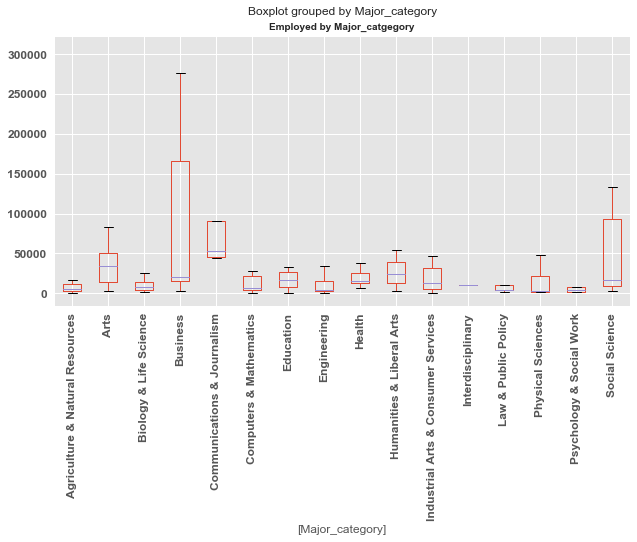

In [40]:
# A lot of the variables in this data set are categorical variables. Scikit-learn will not 
# accept categorical features by default.
# Need to encode categorical features numerically. Convert to ‘dummy variables’. 
# <ul>
# <li> 0: Observation was NOT that category </li>
# <li> 1: Observation was that category </li>
# </ul>


ll23= recent_grads[['Major_category', 'Employed' ]]
ll23.boxplot(by="Major_category",figsize=(10,5), fontsize=12)
plt.xticks(rotation=90,  weight="bold")
plt.yticks(weight="bold")
plt.title("Employed by Major_catgegory", weight="bold", fontsize=10)
plt.show()